0.18.1


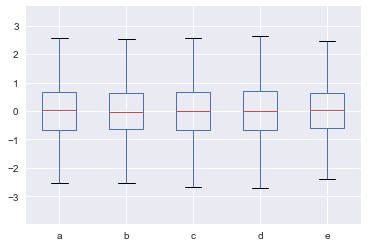

In [2]:
# coding: utf-8
## kaggle入门实例——房屋价格预测，回归问题
## 详细记录各种使用技巧
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import sklearn
print(sklearn.__version__)
%matplotlib inline
frame = pd.DataFrame(np.random.randn(1000,5),columns=['a','b','c','d','e'])
#frame.iloc[::2] = np.nan
frame.plot.box()
plt.show()

In [212]:
df_train = pd.read_csv("./train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


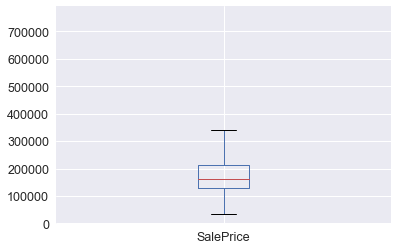

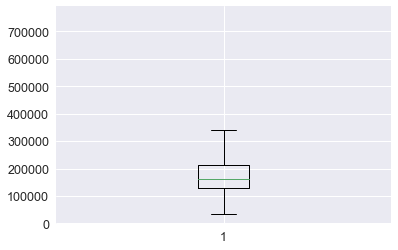

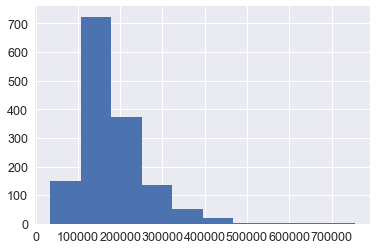

In [213]:
# summary,boxplot,hist
print(df_train["SalePrice"].describe())
plt.figure(1,)
df_train["SalePrice"].plot.box()
plt.figure(2)
plt.boxplot(df_train["SalePrice"])
plt.figure(3)
plt.hist(df_train["SalePrice"])
plt.show()

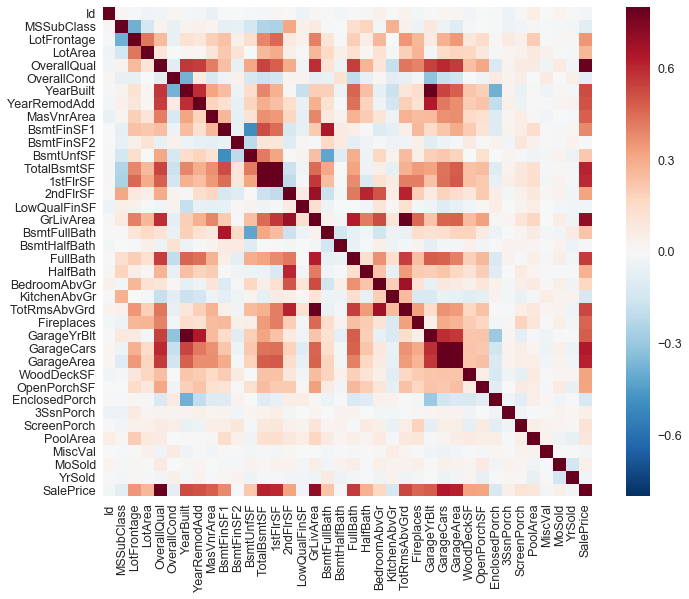

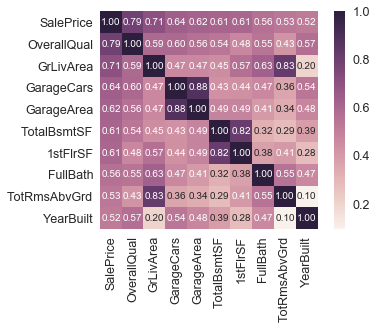

In [214]:
# correlation matrix
corrmat = df_train.corr()
plt.figure()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
# top 10 largest variables
plt.figure()
k = 10
cols = corrmat.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,square=True,fmt=".2f",annot_kws={"size":10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [77]:
# misssing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head(20)
# deal with missing data
df_train = df_train.drop((missing_data[missing_data["Total"]>1]).index,1)
df_train = df_train.drop(df_train.loc[df_train["Electrical"].isnull()].index)
print(df_train.shape)

,Total,Percent
SalePrice,0,0.0
OverallQual,0,0.0
BsmtUnfSF,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


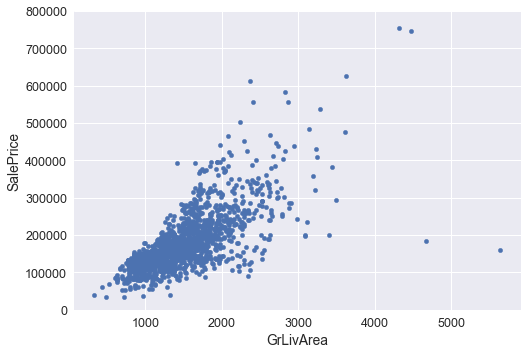

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [84]:
# outlier
var = 'GrLivArea'
data = pd.concat([df_train["SalePrice"],df_train[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))
plt.show()
#deleting points
df_train.sort_values(by="GrLivArea", ascending=False)[:2]
df_train.drop(df_train[df_train["Id"]==1299].index)
df_train.drop(df_train[df_train["Id"]==524].index)

D:\devInstallPath\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


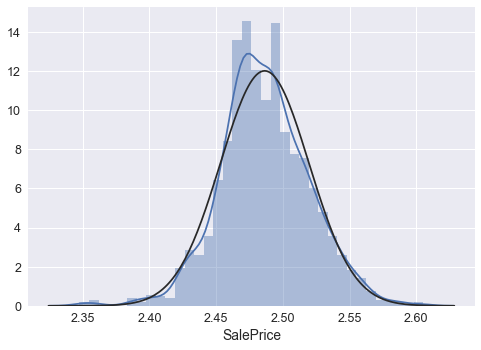

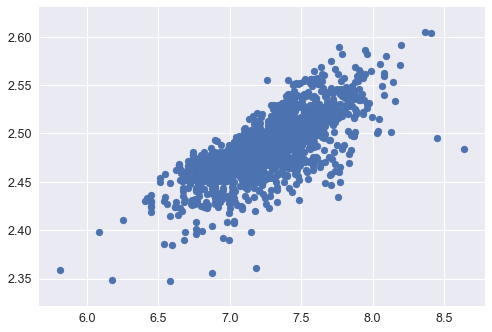

In [116]:
#histogram and normal probability plot

#applying log transformation
# df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
stats.probplot(df_train['SalePrice'])
plt.figure()
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
plt.show()

In [146]:
df_train["enc_street"] = pd.get_dummies(df_train["Street"], drop_first = True)
print(df_train[df_train["enc_street"]==0])

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
52      53          90       RM        110.0     8472   Grvl   NaN      IR2   
335    336         190       RL          NaN   164660   Grvl   NaN      IR1   
582    583          90       RL         81.0    11841   Grvl   NaN      Reg   
812    813          20  C (all)         66.0     8712   Grvl   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1184  1185          20       RL         50.0    35133   Grvl   NaN      Reg   

     LandContour Utilities     ...     PoolQC Fence MiscFeature MiscVal  \
52           Bnk    AllPub     ...        NaN   NaN         NaN       0   
335          HLS    AllPub     ...        NaN   NaN        Shed     700   
582          Lvl    AllPub     ...        NaN   NaN         NaN       0   
812          Bnk    AllPub     ...        NaN   NaN        Shed      54   
1061         Low    AllPub     ...        NaN   NaN        Shed     560

In [209]:
column=np.array(["buying","maint","doors","persons","lug_boot","safety","label"])
car_data = pd.read_csv("./data.txt",names=column)

#class_mapping = {label:idx for idx,label in enumerate(set(df['class label']))}  

label_mapping = {
        'unacc':1, 
        'acc':2,
        'good':3, 
        'vgood':4
    }
persons_mapping = {
        '2':1,
        '4':2,
        'more':3
    }
car_data["persons"] = car_data["persons"].map(persons_mapping)
car_data["label"] = car_data["label"].map(label_mapping)
enc_car_data = pd.get_dummies(car_data)
print(enc_car_data)


      persons  label  buying_high  buying_low  buying_med  buying_vhigh  \
0           1      1            0           0           0             1   
1           1      1            0           0           0             1   
2           1      1            0           0           0             1   
3           1      1            0           0           0             1   
4           1      1            0           0           0             1   
5           1      1            0           0           0             1   
6           1      1            0           0           0             1   
7           1      1            0           0           0             1   
8           2      1            0           0           0             1   
9           2      1            0           0           0             1   
10          2      1            0           0           0             1   
11          2      1            0           0           0             1   
12          2      1     

In [3]:
import numpy as np
a = np.array([[1,2],[3,4]])
print(a)
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))

[[1 2]
 [3 4]]
[4 6]
[3 7]
